In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random

In [2]:
data = np.zeros(1000000000)
sig = 0

for i in range(1000000000):
    data[i] = random.uniform(0.000000000000001, 1)
    data[i] = -math.log10(data[i])
    if data[i] >= 7.3:
        sig += 1

print(data)
print(sig)

[0.4965431  0.72227848 1.13535257 ... 0.41820639 2.56056665 0.59783054]
51


In [3]:
def lap_noise(data, epsilon, N):
    pri_data = data + np.random.laplace(loc = 0.0, scale = 2.33/epsilon, size=data.shape)
    
    min = 10000
    
    for i in range(1000000000):
        if pri_data[i] > 0 and pri_data[i] < min:
            min = pri_data[i]
    
    for i in range(1000000000):
        if pri_data[i] < 0:
            pri_data[i] = min
    
    return pri_data

In [4]:
def precision(tp,fp):
    return tp/(tp+fp)

def recall(tp,fn):
    return tp/(tp+fn)

def f(tp,fp,fn):
    pre = precision(tp,fp)
    rec = recall(tp,fn)
    return 2*pre*rec/(pre+rec)

In [5]:
pri_data = lap_noise(data, 10, 100000)
print(pri_data)

[0.2416265  0.68555268 1.1387411  ... 0.81499106 2.18214394 0.52628607]


In [6]:
si = 0
sigi = np.zeros(1000000000)

for i in range(1000000000):
    if pri_data[i] >= 6:
        sigi[si] = i
        si += 1

print(si)

1366


In [7]:
tp = np.zeros(30)
fp = np.zeros(30)
fn = np.zeros(30)

th = np.zeros(30)

for i in range(30):
    th[i] = 6 + i*0.1


for i in range(si):
    for j in range(30):
        if pri_data[int(sigi[i])] > th[j]:
            if data[int(sigi[i])] >= 7.3:
                tp[j] += 1
            else:
                fp[j] += 1
        else:
            break

for j in range(30):
    fn[j] = sig - tp[j]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.7796610169491525 7.3


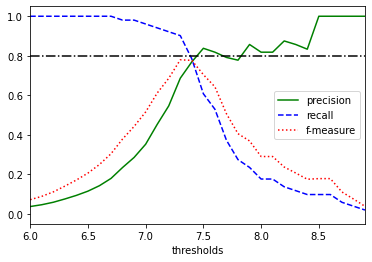

In [8]:
pre = np.zeros(30)
rec = np.zeros(30)
fme = np.zeros(30)

max = 0
maxi = 0

for i in range(30):
    pre[i] = precision(tp[i], fp[i])
    rec[i] = recall(tp[i], fn[i])
    fme[i] = f(tp[i],fp[i],fn[i])
    if fme[i] > max:
        max = fme[i]
        maxi = i

print(max, 6 + maxi*0.1)

fig = plt.figure()
plt.ylim(-0.05,1.05)
plt.xlim(6,8.9)
plt.plot(th, pre, marker="", color = "green", linestyle = "-", label = "precision")
plt.plot(th, rec, marker="", color = "blue", linestyle = "--", label = "recall")
plt.plot(th, fme, marker="", color = "red", linestyle = "dotted", label = "f-measure")
plt.axhline(0.8, color = "black", linestyle = "-.")
plt.legend()
plt.xlabel("thresholds")
plt.ylabel("")
fig.savefig("thresholds_chi2_22_logp_epsilon=10.png")
fig.savefig("fig/thresholds_chi2_22_logp_epsilon=10.eps")

In [9]:
pri_data = lap_noise(data, 7, 100000)
print(pri_data)

[3.06483949e-10 5.33684362e-01 1.35329003e+00 ... 4.65322008e-01
 2.68783764e+00 9.15323198e-01]


In [10]:
tp = np.zeros(30)
fp = np.zeros(30)
fn = np.zeros(30)

th = np.zeros(30)

for i in range(30):
    th[i] = 6 + i*0.1


for i in range(si):
    for j in range(30):
        if pri_data[int(sigi[i])] > th[j]:
            if data[int(sigi[i])] >= 7.3:
                tp[j] += 1
            else:
                fp[j] += 1
        else:
            break

for j in range(30):
    fn[j] = sig - tp[j]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5961538461538461 7.5


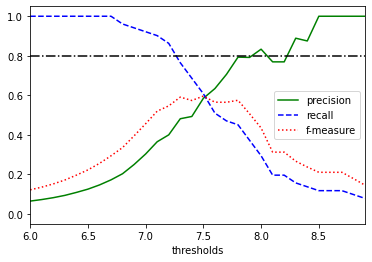

In [11]:
pre = np.zeros(30)
rec = np.zeros(30)
fme = np.zeros(30)

max = 0
maxi = 0

for i in range(30):
    pre[i] = precision(tp[i], fp[i])
    rec[i] = recall(tp[i], fn[i])
    fme[i] = f(tp[i],fp[i],fn[i])
    if fme[i] > max:
        max = fme[i]
        maxi = i

print(max, 6 + maxi*0.1)

fig = plt.figure()
plt.ylim(-0.05,1.05)
plt.xlim(6,8.9)
plt.plot(th, pre, marker="", color = "green", linestyle = "-", label = "precision")
plt.plot(th, rec, marker="", color = "blue", linestyle = "--", label = "recall")
plt.plot(th, fme, marker="", color = "red", linestyle = "dotted", label = "f-measure")
plt.axhline(0.8, color = "black", linestyle = "-.")
plt.legend()
plt.xlabel("thresholds")
plt.ylabel("")
fig.savefig("thresholds_chi2_22_logp_epsilon=7.png")
fig.savefig("fig/thresholds_chi2_22_logp_epsilon=7.eps")

In [12]:
pri_data = lap_noise(data, 5, 100000)
print(pri_data)

[5.77767278e-11 6.17711812e-01 8.87592534e-01 ... 5.38851472e-01
 3.78987465e+00 1.11396183e+00]


In [13]:
tp = np.zeros(30)
fp = np.zeros(30)
fn = np.zeros(30)

th = np.zeros(30)

for i in range(30):
    th[i] = 6 + i*0.1


for i in range(si):
    for j in range(30):
        if pri_data[int(sigi[i])] > th[j]:
            if data[int(sigi[i])] >= 7.3:
                tp[j] += 1
            else:
                fp[j] += 1
        else:
            break

for j in range(30):
    fn[j] = sig - tp[j]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.4444444444444445 7.8


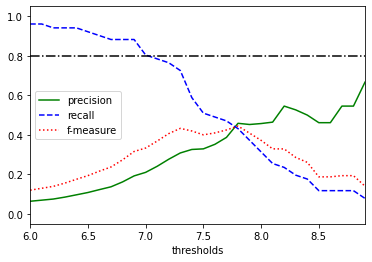

In [14]:
pre = np.zeros(30)
rec = np.zeros(30)
fme = np.zeros(30)

max = 0
maxi = 0

for i in range(30):
    pre[i] = precision(tp[i], fp[i])
    rec[i] = recall(tp[i], fn[i])
    fme[i] = f(tp[i],fp[i],fn[i])
    if fme[i] > max:
        max = fme[i]
        maxi = i

print(max, 6 + maxi*0.1)

fig = plt.figure()
plt.ylim(-0.05,1.05)
plt.xlim(6,8.9)
plt.plot(th, pre, marker="", color = "green", linestyle = "-", label = "precision")
plt.plot(th, rec, marker="", color = "blue", linestyle = "--", label = "recall")
plt.plot(th, fme, marker="", color = "red", linestyle = "dotted", label = "f-measure")
plt.axhline(0.8, color = "black", linestyle = "-.")
plt.legend()
plt.xlabel("thresholds")
plt.ylabel("")
fig.savefig("thresholds_chi2_22_logp_epsilon=5.png")
fig.savefig("fig/thresholds_chi2_22_logp_epsilon=5.eps")